In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 
import os
get_ipython().run_line_magic('matplotlib', 'inline')

In [13]:
party = pd.read_csv('/Users/Mia/Desktop/party_in_nyc.csv')
party.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [14]:
party.shape

(225414, 8)

In [15]:
party.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [16]:
party.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303


In [17]:
#Where do most of the complaints come from?

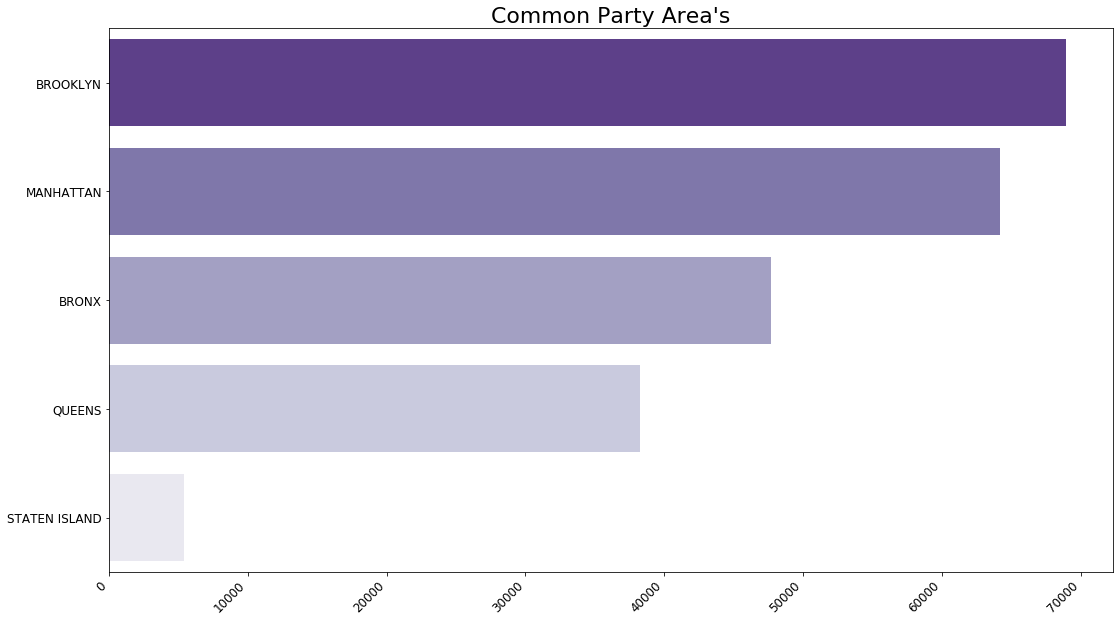

In [30]:
party.drop(party[party['Borough'] == 'Unspecified'].index, inplace=True)
borough_stat = party['Borough'].value_counts()
borough_index = borough_stat.index
borough_values = borough_stat.values
plt.figure(figsize=(18,10))
borough_plot = sns.barplot(x=borough_values, y=borough_index, orient='h', palette='Purples_r')
plt.title('Common Party Area\'s', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

In [31]:
#Location Type

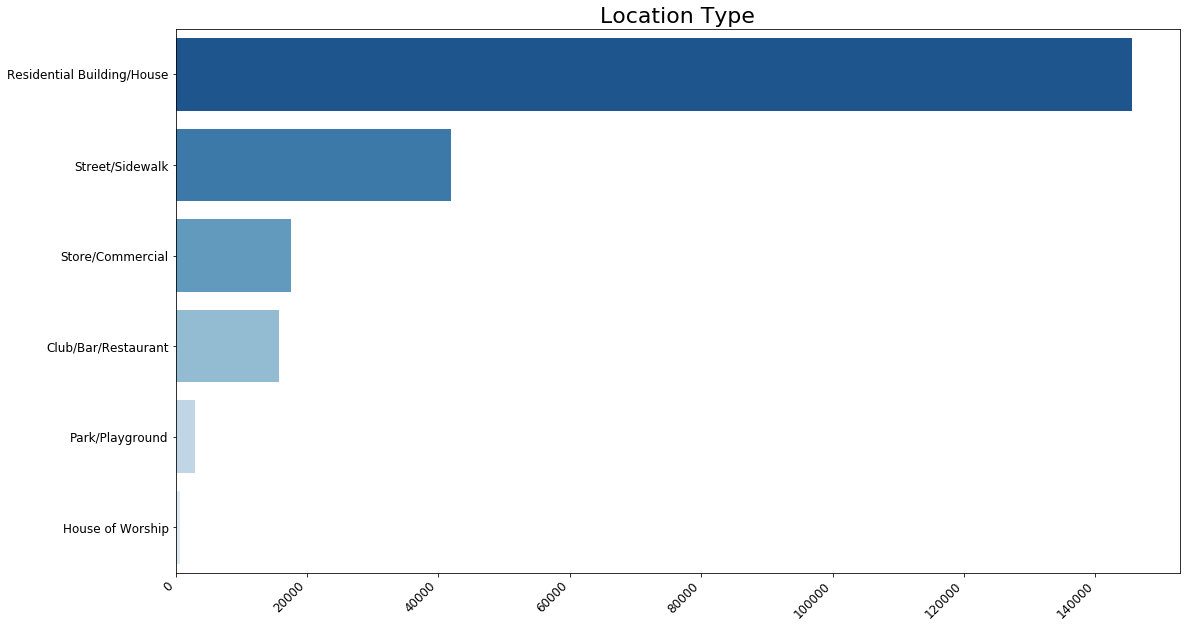

In [32]:
location_stat = party['Location Type'].value_counts()
location_index = location_stat.index
location_values = location_stat.values
plt.figure(figsize=(18,10))
location_plot = sns.barplot(x=location_values, y=location_index, orient='h', palette='Blues_r')
plt.title('Location Type', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

In [33]:
#Combining both Location Type and Area

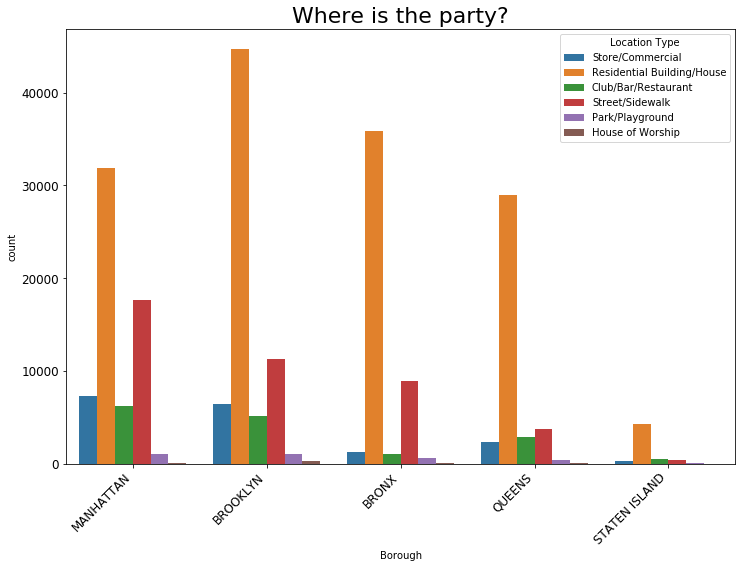

In [34]:
plt.figure(figsize=(12,8))
bor_loc_plot = sns.countplot(party['Borough'], hue=party['Location Type'])
plt.title('Where is the party?', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

In [35]:
party['Created Date'] = pd.to_datetime(party['Created Date'])
party['Closed Date'] = pd.to_datetime(party['Closed Date'])
party['month'] = pd.DatetimeIndex(party['Created Date']).month 
party['day'] = pd.DatetimeIndex(party['Created Date']).day
party['day'] = party['Created Date'].dt.day_name()
party['hour'] = pd.DatetimeIndex(party['Created Date']).hour
party

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,month,day,hour
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,Thursday,0
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,Thursday,0
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,Thursday,0
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,Thursday,0
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585,12,Saturday,23
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617,12,Saturday,23
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067,12,Saturday,23
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279,12,Saturday,23


In [36]:
#Month where Police recieved the most complaints

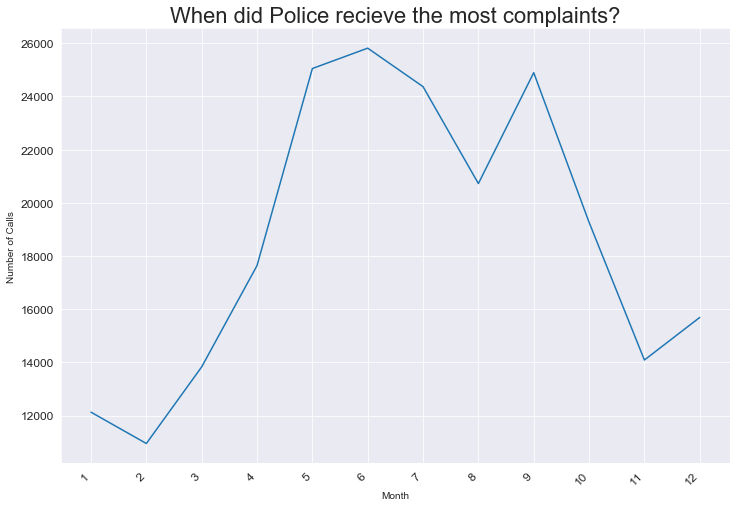

In [39]:
month_stat = party['month'].value_counts()
month_index = month_stat.index
month_values = month_stat.values
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
time_plot = sns.lineplot(x=month_index, y=month_values, palette='Reds_r')
plt.title('When did Police recieve the most complaints?', size=22)
plt.xticks(month_index, rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

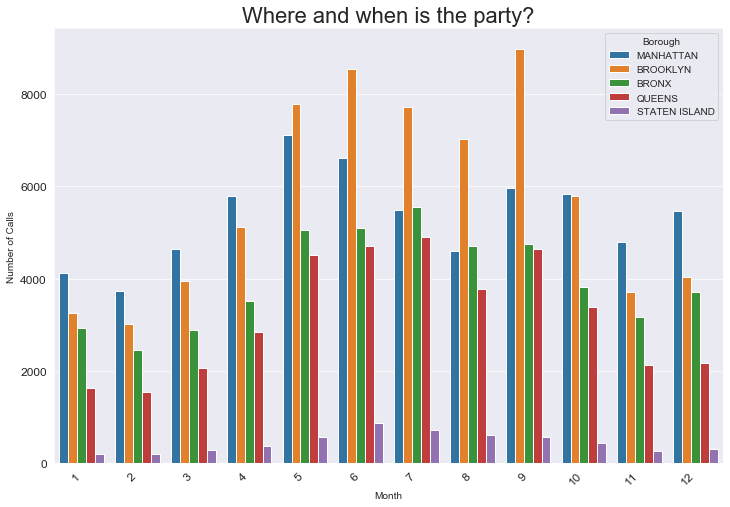

In [41]:
plt.figure(figsize=(12,8))
bor_loc_plot = sns.countplot(party['month'], hue=party['Borough'])
plt.title('Where and when is the party?', size=22)
plt.xticks( rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.show()

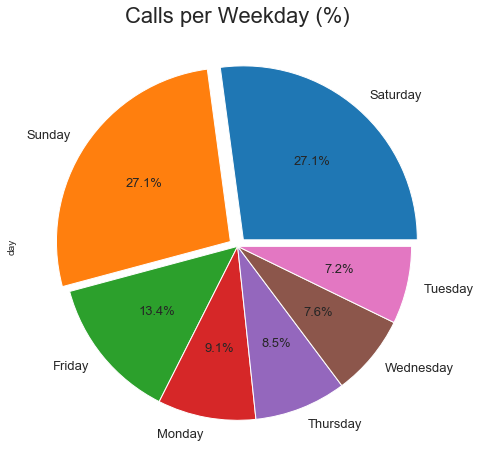

In [54]:
plt.figure(figsize=(12,8))
explode = (0.05, 0.05, 0, 0, 0, 0, 0)
labels= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
party['day'].value_counts().plot(kind='pie', autopct='%.1f%%', textprops={'fontsize': 13}, explode=explode)
plt.title('Calls per Weekday (%)', size=22)
plt.show()

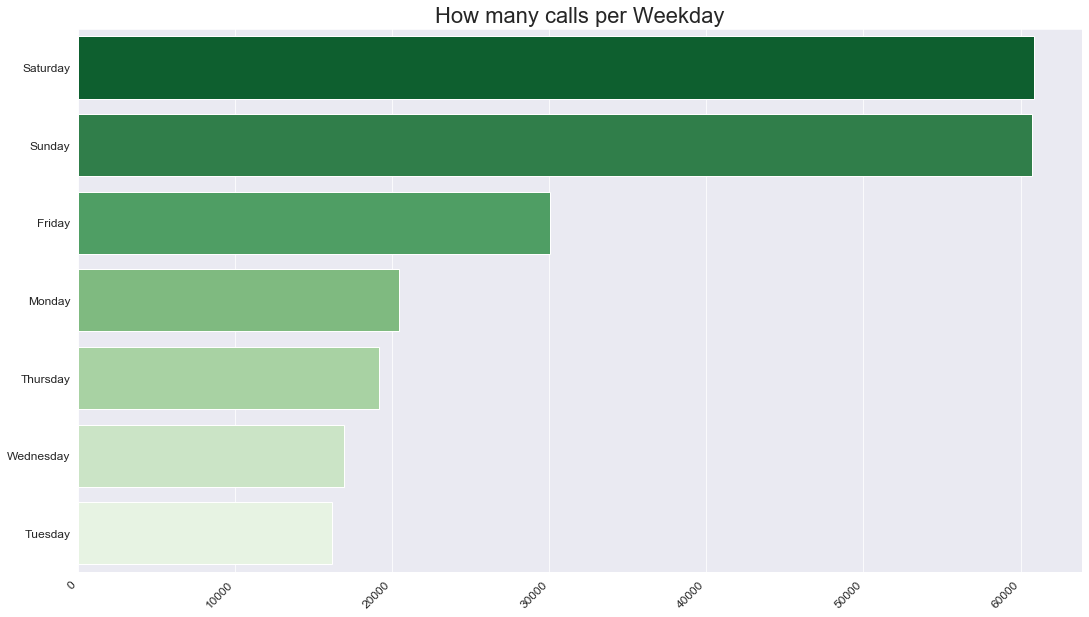

In [57]:
day_stat = party['day'].value_counts()
day_index = day_stat.index
day_values = day_stat.values
plt.figure(figsize=(18,10))
location_plot = sns.barplot(x=day_values, y=day_index, orient='h', palette='Greens_r')
plt.title('How many calls per Weekday', size=22)
plt.xticks(rotation=45, ha='right', size=12)
plt.yticks(size=12)
plt.show()

In [58]:
#Number of calls (By Time)

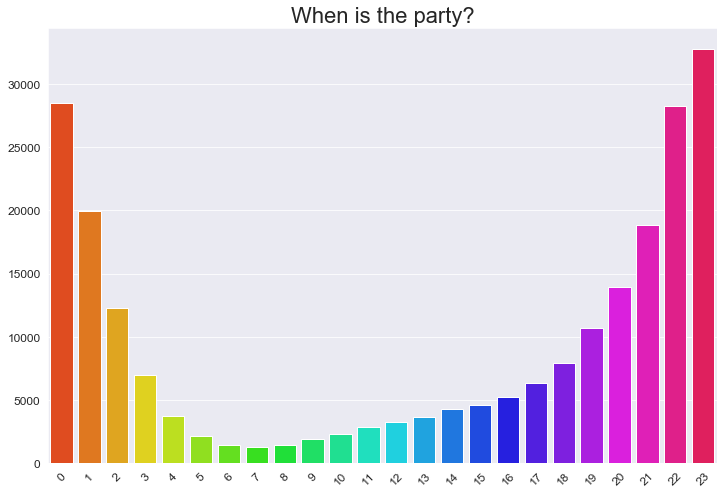

In [59]:
hour_stat = party['hour'].value_counts()
hour_index = hour_stat.index
hour_values = hour_stat.values
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
time_plot = sns.barplot(x=hour_index, y=hour_values, palette='hsv')
plt.title('When is the party?', size=22)
plt.xticks( rotation=45, size=12)
plt.yticks(size=12)
plt.show()

In [60]:
#How long for close date

In [64]:
open_date = party['Created Date']
close_date = party['Closed Date']
party['duration'] = close_date - open_date
seconds  = party['duration'].apply(lambda x: x.total_seconds())
party['in_minutes'] = round(seconds/60, 1)
party

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,month,day,hour,duration,in_minutes
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,Thursday,0,03:46:49,226.8
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,Thursday,0,04:33:25,273.4
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,Thursday,0,00:36:50,36.8
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,Thursday,0,01:50:12,110.2
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,Thursday,0,03:44:00,224.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585,12,Saturday,23,00:07:44,7.7
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617,12,Saturday,23,02:10:05,130.1
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067,12,Saturday,23,13:37:40,817.7
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279,12,Saturday,23,03:52:31,232.5


In [66]:
party = party[(party['in_minutes']>0)&(party['in_minutes']<24*60)]
party.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


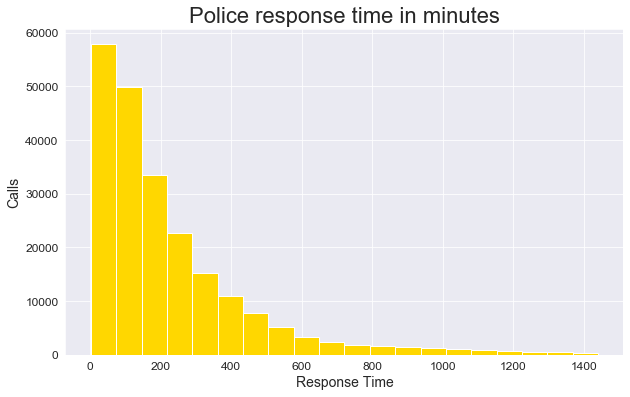

In [67]:
plt.figure(figsize=(20,11))
party['in_minutes'].plot.hist(bins=20, figsize=(10,6), color='gold')
plt.title('Police response time in minutes', size=22)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Response Time', size=14)
plt.ylabel('Calls', size=14)
plt.show()


In [68]:
newparty = party.groupby('Borough')['in_minutes'].mean()
newparty

Borough
BRONX            324.346135
BROOKLYN         200.564522
MANHATTAN        186.213659
QUEENS           207.937877
STATEN ISLAND    210.674838
Name: in_minutes, dtype: float64

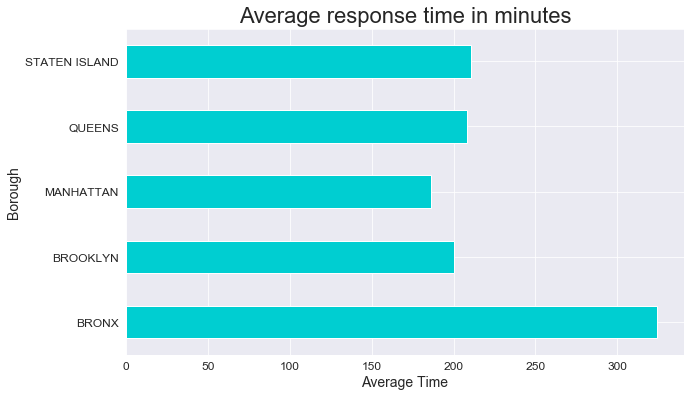

In [69]:
plt.figure(figsize=(12,8))
newparty.plot.barh(figsize=(10,6), color='darkturquoise')
plt.title('Average response time in minutes', size=22)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Average Time', size=14)
plt.ylabel('Borough', size=14)
plt.show()